In [14]:
%matplotlib inline 

import os
import re
import csv

import pandas as pd 
import seaborn as sns 

In [9]:
def parse_server_log(path):
    clipat = re.compile(r'^(\d+) clients$')
    conpat = re.compile(r'^\[honu\] ([\d\.:]+) created (\w+) consistency storage$')
    thrpat = re.compile(r'^\[honu\] ([\d\.:]+) (\d+) accesses \(\d+ reads, \d+ writes\) in ([\d\.]+)s -- ([\d\.]+) accesses/second$')

    clients = None 
    consistency = None 
    
    with open(path, 'r') as f:
        for line in f:
            line = line.strip() 
            
            match = clipat.match(line)
            if match is not None:
                clients = match.groups()[0]
            
            match = conpat.match(line)
            if match is not None:
                consistency = match.groups()[1]
            
            match = thrpat.match(line)
            if match is not None:
                yield {
                    "clients": clients, 
                    "consistency": consistency, 
                    "accesses": int(match.groups()[1]),
                    "seconds": float(match.groups()[2]),
                    "throughput (accesses/sec)": float(match.groups()[3]),
                }

In [15]:
with open('server-throughput.csv', 'w') as out:
    writer = csv.DictWriter(out, fieldnames=("clients", "consistency", "accesses", "seconds", "throughput (accesses/sec)"))
    writer.writeheader()
    
    for path in ('server-lin.log', 'server-seq.log'):
        for row in parse_server_log(path):
            writer.writerow(row)

In [16]:
data = pd.read_csv('server-throughput.csv')

In [17]:
data.dtypes

clients                        int64
consistency                   object
accesses                       int64
seconds                      float64
throughput (accesses/sec)    float64
dtype: object

In [18]:
data.describe()

,clients,accesses,seconds,throughput (accesses/sec)
count,250.000000,250.000000,250.000000,250.000000
mean,13.000000,408909.316000,30.014886,13622.305888
std,7.225568,155536.202091,0.008949,5180.054161
min,1.000000,44464.000000,29.995384,1482.220700
25%,7.000000,308266.000000,30.008624,10272.468550
50%,13.000000,488522.500000,30.016259,16272.139000
75%,19.000000,517723.500000,30.021509,17244.106200
max,25.000000,553298.000000,30.040170,18432.380300


In [21]:
sns.set_style('whitegrid')
sns.set_context('poster')

(0, 21000)

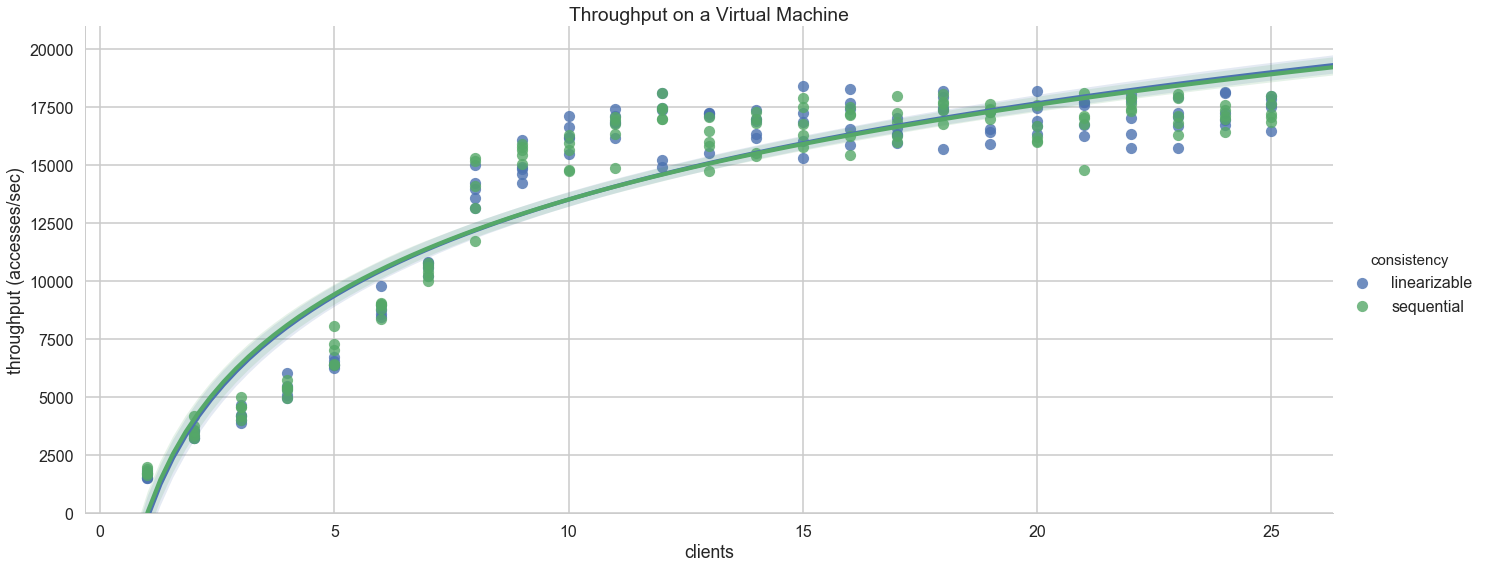

In [34]:
g = sns.lmplot(x="clients", y="throughput (accesses/sec)", hue="consistency", logx=True, size=8, aspect=2.4, data=data)
g.axes[0][0].set_title("Throughput on a Virtual Machine")
g.axes[0][0].set_ylim(0,21000)

In [30]:
g.axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10bba6668>]], dtype=object)